In [ ]:
!pip install esda pysal

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile, io

import esda
import geopandas as gpd
from libpysal.weights import Queen

from esda import Moran_Local
from splot.esda import moran_scatterplot

from splot.esda import lisa_cluster, plot_local_autocorrelation

In [ ]:
# Passo 2: Carregar o arquivo GeoJSON
geojson_path = "brazil_geo.json"
gdf_brazil_uf = gpd.read_file(geojson_path)

In [ ]:
# Passo 3: Processar os dados de abstenção
df_abstencao_2022 = pd.read_csv('abstencao_2022.csv', sep=',')
df_abstencao_2024 = pd.read_csv('abstencao_2024.csv', sep=',')

In [ ]:
df_abstencao_2022['tx_abstencao_analfabetos'] = (df_abstencao_2022['abstencao_analfabetos'] / df_abstencao_2022['eleitorado_analfabetos']) * 100
df_abstencao_2022['tx_abstencao_deficientes'] = (df_abstencao_2022['abstencao_deficientes'] / df_abstencao_2022['eleitorado_deficientes']) * 100

df_abstencao_2024['tx_abstencao_analfabetos'] = (df_abstencao_2024['abstencao_analfabetos'] / df_abstencao_2024['eleitorado_analfabetos']) * 100
df_abstencao_2024['tx_abstencao_deficientes'] = (df_abstencao_2024['abstencao_deficientes'] / df_abstencao_2024['eleitorado_deficientes']) * 100

In [ ]:
# Unir os dados de abstenção com os dados geográficos
gdf_brazil_uf_2022 = gdf_brazil_uf.merge(df_abstencao_2022, left_on='id', right_on='uf')
gdf_brazil_uf_2024 = gdf_brazil_uf.merge(df_abstencao_2024, left_on='id', right_on='uf')

In [ ]:
# Crie o GeoDataFrame
gdf_2022 = gpd.GeoDataFrame(gdf_brazil_uf_2022, geometry='geometry', crs='EPSG:4326')
gdf_2024 = gpd.GeoDataFrame(gdf_brazil_uf_2024, geometry='geometry', crs='EPSG:4326')

In [ ]:
# Crie a matriz de pesos espaciais
w_2022 = Queen.from_dataframe(gdf_2022)
w_2022.transform = 'r'

w_2024 = Queen.from_dataframe(gdf_2024)
w_2024.transform = 'r'

<ipython-input-31-9c57585b8a84>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_2022 = Queen.from_dataframe(gdf_2022)
<ipython-input-31-9c57585b8a84>:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_2024 = Queen.from_dataframe(gdf_2024)


In [ ]:
# Calcule o Índice de Moran
moran_2022_analfabetos = esda.Moran(gdf_2022['tx_abstencao_analfabetos'].values, w_2022)
moran_2022_deficientes = esda.Moran(gdf_2022['tx_abstencao_deficientes'].values, w_2022)
moran_2024_analfabetos = esda.Moran(gdf_2024['tx_abstencao_analfabetos'].values, w_2024)
moran_2024_deficientes = esda.Moran(gdf_2024['tx_abstencao_deficientes'].values, w_2024)

In [ ]:
# Verifique os resultados
print("Índice de Moran I 2022 Analfabetos:", moran_2022_analfabetos.I)
print("P-valor:", moran_2022_analfabetos.p_sim)
print("Z-scores:", moran_2022_analfabetos.z_sim)  # Deve ser uma lista de valores

# Verifique os resultados
print("Índice de Moran I 2022 Deficientes:", moran_2022_deficientes.I)
print("P-valor:", moran_2022_deficientes.p_sim)
print("Z-scores:", moran_2022_deficientes.z_sim)  # Deve ser uma lista de valores

# Verifique os resultados
print("Índice de Moran I 2024 Analfabetos:", moran_2024_analfabetos.I)
print("P-valor:", moran_2024_analfabetos.p_sim)
print("Z-scores:", moran_2024_analfabetos.z_sim)  # Deve ser uma lista de valores

# Verifique os resultados
print("Índice de Moran I 2024 Deficientes:", moran_2024_deficientes.I)
print("P-valor:", moran_2024_deficientes.p_sim)
print("Z-scores:", moran_2024_deficientes.z_sim)  # Deve ser uma lista de valores

Índice de Moran I 2022 Analfabetos: 0.589980771117385
P-valor: 0.001
Z-scores: 4.798189605659931
Índice de Moran I 2022 Deficientes: -0.2386528728483636
P-valor: 0.056
Z-scores: -1.4898763475239225
Índice de Moran I 2024 Analfabetos: 0.5519555860076876
P-valor: 0.001
Z-scores: 4.163827287877503
Índice de Moran I 2024 Deficientes: 0.38948502090367343
P-valor: 0.004
Z-scores: 3.200037403193786


In [ ]:
plt.figure(figsize=(12, 8), dpi=300)  # Aumenta o tamanho e a resolução
gdf_2022.plot(column='tx_abstencao_analfabetos', cmap='YlGnBu', legend=True, edgecolor='black')
plt.title('Taxa de Abstenção dos Analfabetos por UF nas eleições 2022 (em %)')
plt.savefig("mapa_abstencao_analfabetos_2022.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(12, 8), dpi=300)  # Aumenta o tamanho e a resolução
gdf_2022.plot(column='tx_abstencao_deficientes', cmap='YlGnBu', legend=True, edgecolor='black')
plt.title('Taxa de Abstenção dos Deficientes por UF nas eleições 2022 (em %)')
plt.savefig("mapa_abstencao_deficientes_2022.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(12, 8), dpi=300)  # Aumenta o tamanho e a resolução
gdf_2024.plot(column='tx_abstencao_analfabetos', cmap='YlGnBu', legend=True, edgecolor='black')
plt.title('Taxa de Abstenção dos Analfabetos por UF nas eleições 2024 (em %)')
plt.savefig("mapa_abstencao_analfabetos_2024.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(12, 8), dpi=300)  # Aumenta o tamanho e a resolução
gdf_2024.plot(column='tx_abstencao_deficientes', cmap='YlGnBu', legend=True, edgecolor='black')
plt.title('Taxa de Abstenção dos Deficientes por UF nas eleições 2024 (em %)')
plt.savefig("mapa_abstencao_deficientes_2024.png", dpi=300, bbox_inches="tight")

In [ ]:
# from splot.esda import plot_moran
# plot_moran(moran_2022, zstandard=False, figsize=(12, 12))

# # (Opcional) Salvar a imagem em alta resolução
# plt.savefig("moran_scatterplot_2022.png", dpi=300, bbox_inches="tight")

<Figure size 4500x4500 with 0 Axes>

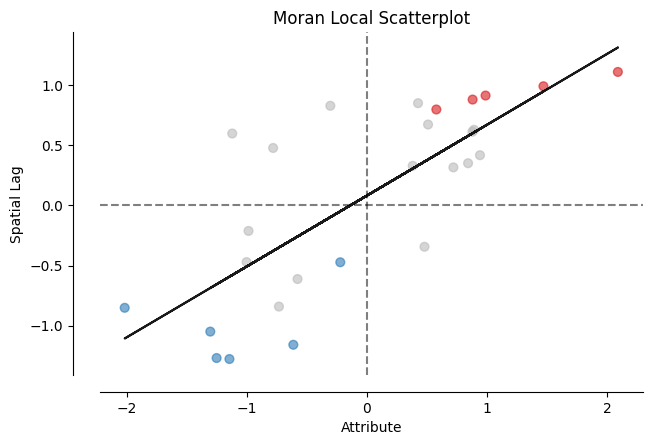

<Figure size 4500x4500 with 0 Axes>

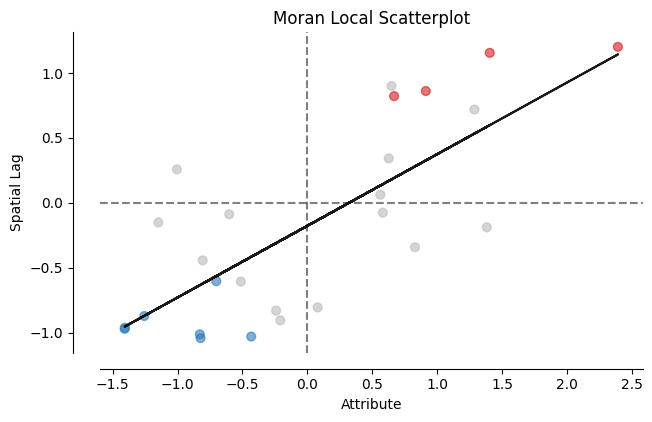

<Figure size 4500x4500 with 0 Axes>

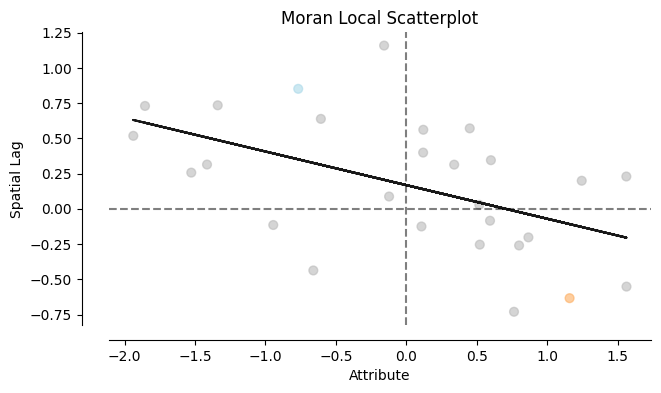

<Figure size 4500x4500 with 0 Axes>

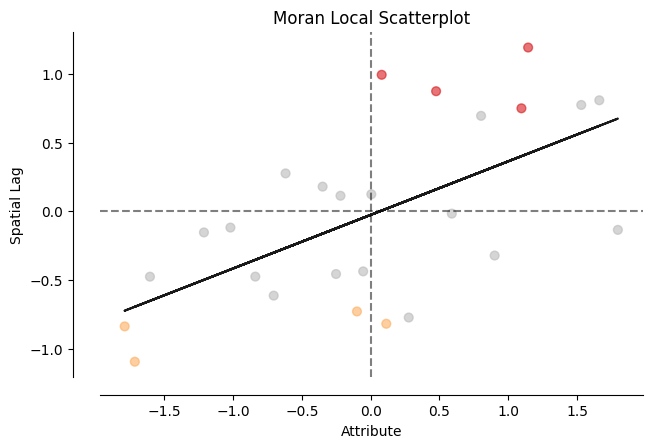

In [ ]:
plt.figure(figsize=(15, 15), dpi=300)
moran_loc_2022_analfabetos = Moran_Local(gdf_2022['tx_abstencao_analfabetos'], w_2022)
moran_scatterplot(moran_loc_2022_analfabetos, p=0.05)
plt.savefig("moran_scatterplot_highres_2022_analfabetos.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(15, 15), dpi=300)
moran_loc_2024_analfabetos = Moran_Local(gdf_2024['tx_abstencao_analfabetos'], w_2024)
moran_scatterplot(moran_loc_2024_analfabetos, p=0.05)
plt.savefig("moran_scatterplot_highres_2024_analfabetos.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(15, 15), dpi=300)
moran_loc_2022_deficientes = Moran_Local(gdf_2022['tx_abstencao_deficientes'], w_2022)
moran_scatterplot(moran_loc_2022_deficientes, p=0.05)
plt.savefig("moran_scatterplot_highres_2022_deficientes.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(15, 15), dpi=300)
moran_loc_2024_deficientes = Moran_Local(gdf_2024['tx_abstencao_deficientes'], w_2024)
moran_scatterplot(moran_loc_2024_deficientes, p=0.05)
plt.savefig("moran_scatterplot_highres_2024_deficientes.png", dpi=300, bbox_inches="tight")

In [ ]:
lisa_cluster(moran_loc_2022, gdf_2022, p=0.05, figsize=(12, 12))

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

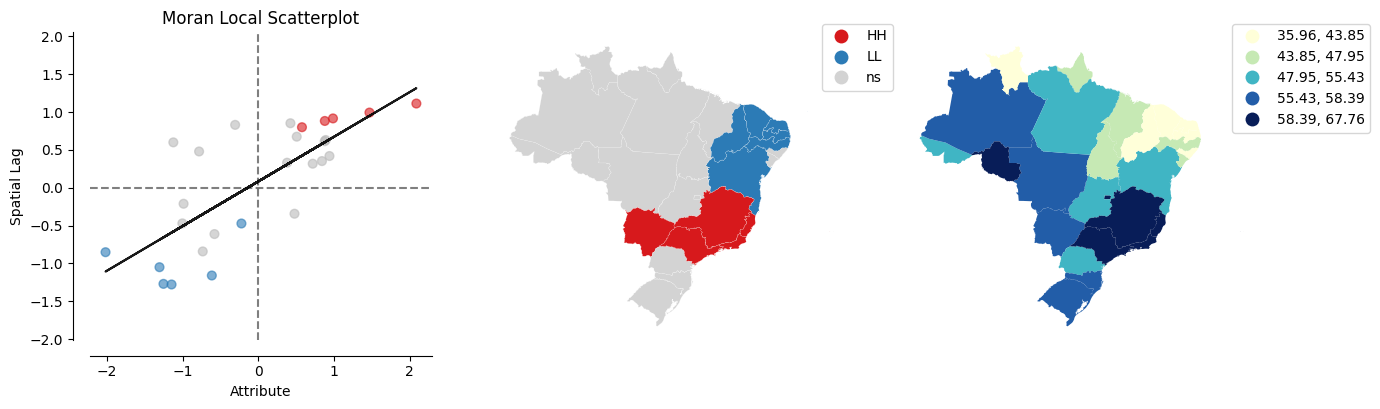

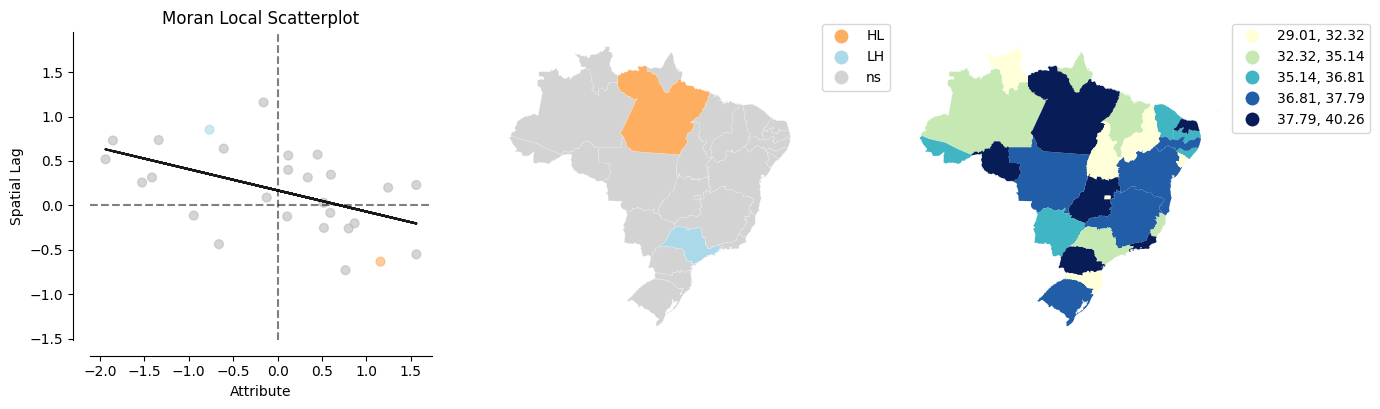

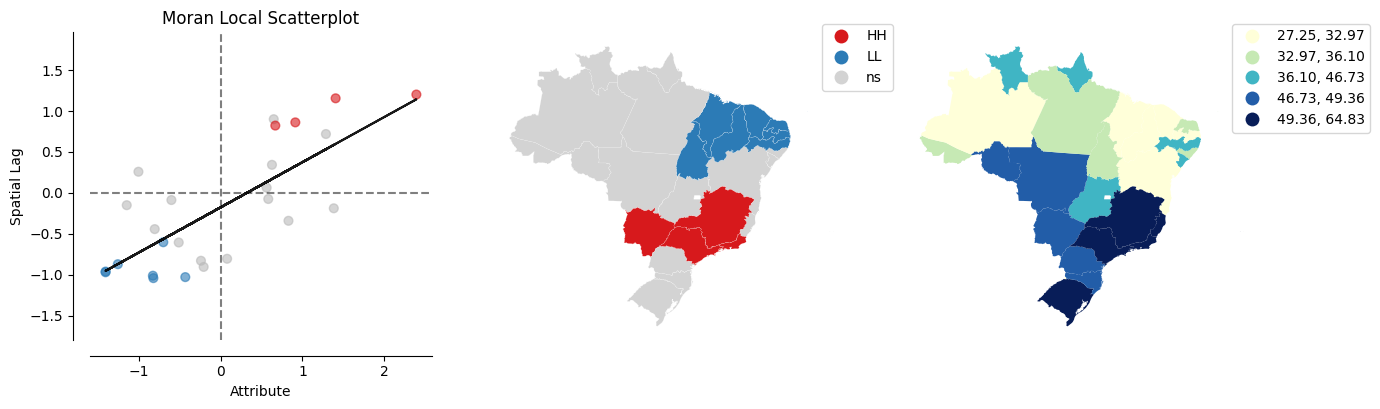

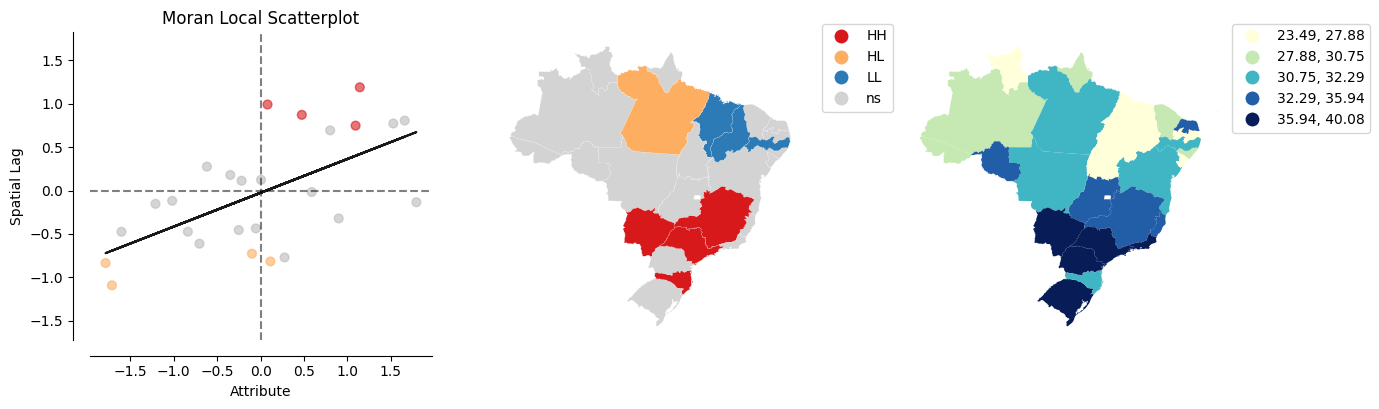

In [ ]:
plot_local_autocorrelation(moran_loc_2022_analfabetos, gdf_2022, 'tx_abstencao_analfabetos')
plot_local_autocorrelation(moran_loc_2022_deficientes, gdf_2022, 'tx_abstencao_deficientes')
plot_local_autocorrelation(moran_loc_2024_analfabetos, gdf_2024, 'tx_abstencao_analfabetos')
plot_local_autocorrelation(moran_loc_2024_deficientes, gdf_2024, 'tx_abstencao_deficientes')